In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

# Importing the datasets

datasets =pd.read_csv('bakimdurusanalizyapilacak.csv', delimiter=';', skiprows=0, low_memory=False)


In [3]:
datasets

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
0,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,7,2018,C 02
1,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,2,2018,C 02
2,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,GÖKHAN GÖK,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",20,2018,C 02
3,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,17,2018,C 02
4,(C 02) MAZAK QT-28N (TORNA),001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 02
...,...,...,...,...,...,...,...,...,...,...,...
1995,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 16:41,18.12.2018 16:59,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,18,2018,C 112
1996,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:00,18.12.2018 17:36,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,36,2018,C 112
1997,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:36,18.12.2018 17:37,ARİF TARIM,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.2) KAPI, SAC, COVER",1,2018,C 112
1998,(C 112) MAZAK HCN-6800 II (YİM),"9,13E+19",18.12.2018 17:57,18.12.2018 17:58,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,1,2018,C 112


In [4]:
datasets["Makine"].unique()

array(['(C 02) MAZAK QT-28N (TORNA)', '(C 10) MAZAK QT-28N (TORNA)',
       '(C 100) MAZAK QTN-II-200 (TORNA)',
       '(C 101) MAZAK QTN-II-150 (TORNA)',
       '(C 102) MAZAK QTN-II-150 (TORNA)',
       '(C 103) MAZAK QTN-II-150 (TORNA)', '(C 105) MAZAK HCN-5000 (YİM)',
       '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)',
       '(C 108) MAZAK QTN-250 II (TORNA)',
       '(C 109) MAZAK QTN-250 II (TORNA)',
       '(C 110) MAZAK VTC-200-C (DİM)', '(C 112) MAZAK HCN-6800 II (YİM)'],
      dtype=object)

In [5]:

datasets["Makine"]= datasets["Makine"].replace({"(C 02) MAZAK QT-28N (TORNA)":228,   '(C 10) MAZAK QT-28N (TORNA)':1028, '(C 100) MAZAK QTN-II-200 (TORNA)':100200,
                                               '(C 101) MAZAK QTN-II-150 (TORNA)':101150, '(C 102) MAZAK QTN-II-150 (TORNA)':102150, 
                                               '(C 103) MAZAK QTN-II-150 (TORNA)':103150, '(C 105) MAZAK HCN-5000 (YİM)':1055000,
                                                '(C 107) LİMİT KGS16324HO (NC TAŞLAMA)':107,'(C 108) MAZAK QTN-250 II (TORNA)':108250,
                                                '(C 109) MAZAK QTN-250 II (TORNA)':109250,'(C 110) MAZAK VTC-200-C (DİM)':110200, 
                                                '(C 112) MAZAK HCN-6800 II (YİM)':1126800})    
datasets


,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
0,228,001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,7,2018,C 02
1,228,001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,2,2018,C 02
2,228,001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,GÖKHAN GÖK,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",20,2018,C 02
3,228,001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,17,2018,C 02
4,228,001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,ALI RIZA EREN,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 02
...,...,...,...,...,...,...,...,...,...,...,...
1995,1126800,"9,13E+19",18.12.2018 16:41,18.12.2018 16:59,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,18,2018,C 112
1996,1126800,"9,13E+19",18.12.2018 17:00,18.12.2018 17:36,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,36,2018,C 112
1997,1126800,"9,13E+19",18.12.2018 17:36,18.12.2018 17:37,ARİF TARIM,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.2) KAPI, SAC, COVER",1,2018,C 112
1998,1126800,"9,13E+19",18.12.2018 17:57,18.12.2018 17:58,FATİH AKYOL,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,1,2018,C 112


In [6]:
datasets["Personel"].value_counts()
datasets["Personel"].unique()

array(['ALI RIZA EREN', 'GÖKHAN GÖK', 'ARİF TARIM', 'MURAT TILKI',
       'ERKAN SAHIN', 'MEHMET AKA', 'İLYAS ÖZ', 'UMUT DEMİR',
       'İBRAHİM HALİL SALMAN', 'LEVENT DEMİR', 'DURSUN ARIK',
       'KEMAL DEMİR', 'ÖZDEN ÇELIK', 'KEMAL ILDEMIR', 'HÜSEYİN ÇETİN',
       'CUMHUR ALTIN', 'ELMAS URAK', 'GÜRKAN ÇETINER', 'ZAFER ÇINAR',
       'MAHMUT KIYMIK', 'MEHMET YASAR TASÇI', 'MUSTAFA ŞEKER',
       'MÜSLÜM GENÇOGLU', 'MUSTAFA GÜNGÖR', 'FERHAT BASTUG',
       'MEHMET ÇETIN', 'ENVER UÇMAZOGLU', 'ESREF BÜYÜKULU',
       'NEVZAT CANPOLAT', 'MEHMET UZUNOGLU', 'KADİR KARAÇAY',
       'HÜSEYİN YAMAÇTEPE', 'HÜSEYİN GAZİ', 'EMIN BORAN', 'TANER BURGUCU',
       'BAŞAR AKŞİT', 'ADEM YEŞİLYURT', 'HAYDAR KILIÇ', 'MURAT BOZER',
       'SERCAN EMRE', 'MÜKREMIN YILDIZ', 'TAHİR ŞAT', 'FERHAT CEREN',
       'GÜVEN TAS', 'TEOMAN ÇORBACI', 'FATİH ÖZKAN', 'ABDÜLHAKİM KAYA',
       'İLKER SACÇI', 'MUSTAFA KARAKUSLU', 'GÜNER TOPALOGLU',
       'MURAT ÖZGÜLSÜM', 'SELÇUK GÜZEL', 'ADEM ÜZÜM', 'HAŞİM GÜNTAŞ',
  

In [7]:
datasets["Personel"]= datasets["Personel"].replace({'ALI RIZA EREN':1, 'GÖKHAN GÖK':2, 'ARİF TARIM':3, 'MURAT TILKI':4,
       'ERKAN SAHIN':5, 'MEHMET AKA':6, 'İLYAS ÖZ':7, 'UMUT DEMİR':8,
       'İBRAHİM HALİL SALMAN':9, 'LEVENT DEMİR':10, 'DURSUN ARIK':11,
       'KEMAL DEMİR':12, 'ÖZDEN ÇELIK':13, 'KEMAL ILDEMIR':14, 'HÜSEYİN ÇETİN':15,
       'CUMHUR ALTIN':16, 'ELMAS URAK':17, 'GÜRKAN ÇETINER':18, 'ZAFER ÇINAR':19,
       'MAHMUT KIYMIK':20, 'MEHMET YASAR TASÇI':21, 'MUSTAFA ŞEKER':22,
       'MÜSLÜM GENÇOGLU':23, 'MUSTAFA GÜNGÖR':24, 'FERHAT BASTUG':25,
       'MEHMET ÇETIN':26, 'ENVER UÇMAZOGLU':27, 'ESREF BÜYÜKULU':28,
       'NEVZAT CANPOLAT':29, 'MEHMET UZUNOGLU':30, 'KADİR KARAÇAY':31,
       'HÜSEYİN YAMAÇTEPE':32, 'HÜSEYİN GAZİ':33, 'EMIN BORAN':34, 'TANER BURGUCU':35,
       'BAŞAR AKŞİT':36, 'ADEM YEŞİLYURT':37, 'HAYDAR KILIÇ':38, 'MURAT BOZER':39,
       'SERCAN EMRE':40, 'MÜKREMIN YILDIZ':41, 'TAHİR ŞAT':42, 'FERHAT CEREN':43,
       'GÜVEN TAS':44, 'TEOMAN ÇORBACI':45, 'FATİH ÖZKAN':46, 'ABDÜLHAKİM KAYA':47,
       'İLKER SACÇI':48, 'MUSTAFA KARAKUSLU':49, 'GÜNER TOPALOGLU':50,
       'MURAT ÖZGÜLSÜM':51, 'SELÇUK GÜZEL':52, 'ADEM ÜZÜM':53, 'HAŞİM GÜNTAŞ':54,
       'YASIN BAYINDIR':55, 'İBRAHİM AYCAN':56, 'SEFA CULFA':57, 'FATIH AKKIRAN':58,
       'OZGUR SAMURCU':59, 'HÜSEYIN KORKMAZ':60, 'TOSKA VATANSEVER':61,
       'YÜKSEL TANER':62, 'CAN ALBAYRAK':63, 'SENAİ HAYIRSEVER':64,
       'MEHMET ERTUGRUL':65, 'GÖKAN BİRİNCİ':66, 'UFUK EŞME':67, 'BURAK ÇİFTÇİ':68,
       'AYHAN AŞAĞI':69, 'İBRAHİM MERCAN':70, 'FATİH AKYOL':71, 'MURAT TOKGOZ':72,
       'YAKUP KORKMAZ':73, 'KÜRŞAT SERT':74, 'OSMAN BULUT':75, 'HİDAYET KAHRAMAN':76,
       'EMRE TUZALAN':77, 'ADEM BAĞIRAN':78})    
datasets

,Makine,Stok kodu,Başlangıç Tarih,Bitiş Tarih,Personel,Arıza Grup 1,Arıza Grup 2,Arıza Grup 3,Çalışma Süresi(Dk) Toplam,yıl,tezgah
0,228,001-0827-00000000030,12.01.2018 03:52,12.01.2018 03:59,1,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,7,2018,C 02
1,228,001-0827-00000000030,12.01.2018 04:00,12.01.2018 04:02,1,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,2,2018,C 02
2,228,001-0827-00000000030,12.01.2018 04:02,12.01.2018 04:22,2,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.3) KAYIS, KAPLIN, REDÜKTÖR, KASNAK",20,2018,C 02
3,228,001-0827-00000000030,5.02.2018 23:40,5.02.2018 23:57,1,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,17,2018,C 02
4,228,001-0827-00000000030,30.03.2018 14:22,30.03.2018 14:33,1,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,11,2018,C 02
...,...,...,...,...,...,...,...,...,...,...,...
1995,1126800,"9,13E+19",18.12.2018 16:41,18.12.2018 16:59,71,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,18,2018,C 112
1996,1126800,"9,13E+19",18.12.2018 17:00,18.12.2018 17:36,71,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,36,2018,C 112
1997,1126800,"9,13E+19",18.12.2018 17:36,18.12.2018 17:37,3,(04) ARIZA,(4.2) MEKANIK ARIZA,"(4.2.2) KAPI, SAC, COVER",1,2018,C 112
1998,1126800,"9,13E+19",18.12.2018 17:57,18.12.2018 17:58,71,(04) ARIZA,(4.7) BAKIMCI BEKLEME,NaN,1,2018,C 112


In [8]:
X = datasets.iloc[:, [0,4]].values
Y = datasets.iloc[:, 8].values

In [44]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [45]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [71]:
# Fitting the classifier into the Training set


from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',gamma='auto', random_state = 1)
classifier.fit(X_Train, Y_Train)


SVC(gamma='auto', kernel='linear', random_state=1)

In [72]:

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

In [73]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

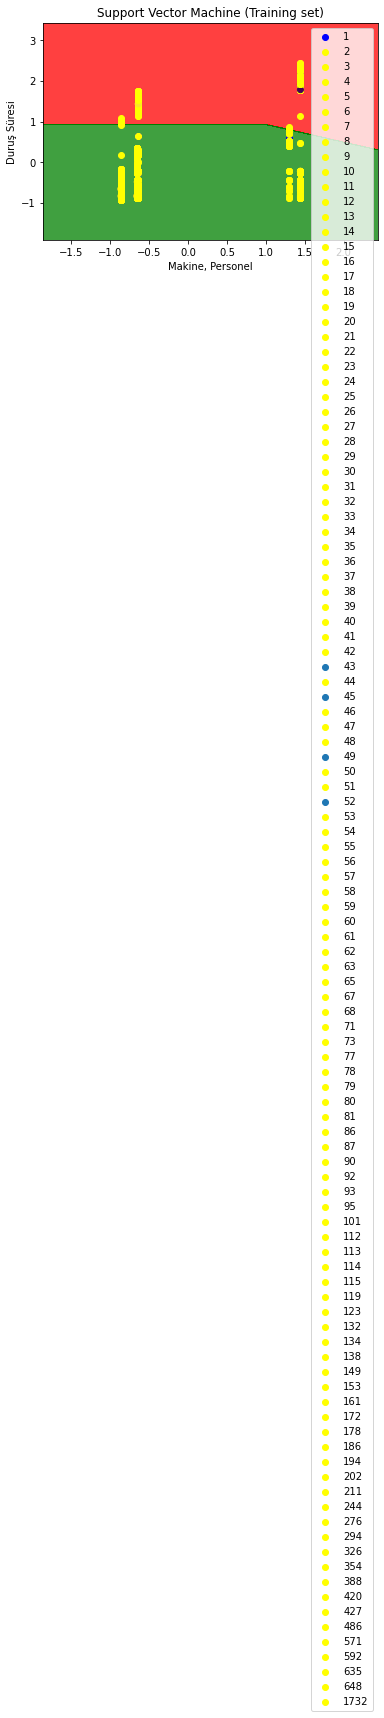

In [74]:
# Visualising the Training set results
from sklearn.metrics import accuracy_score 
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)


plt.title('Support Vector Machine (Training set)')
plt.xlabel('Makine, Personel')
plt.ylabel('Duruş Süresi')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


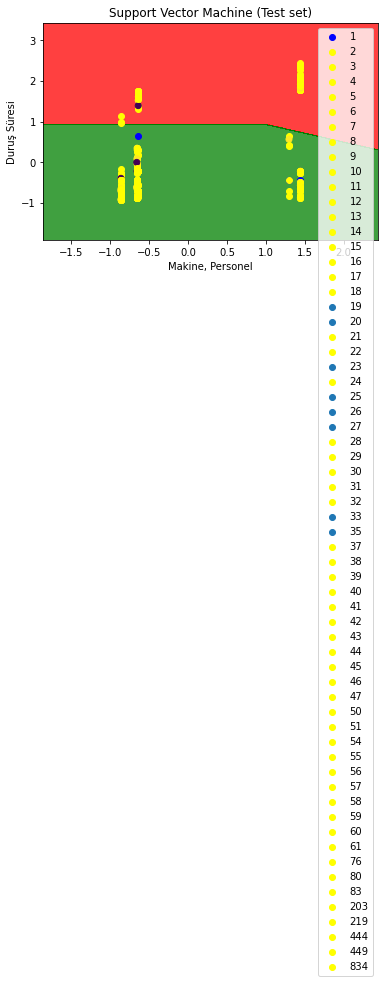

In [75]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Makine, Personel')
plt.ylabel('Duruş Süresi')
plt.legend()
plt.show()


In [76]:


# Training the model on the training data and labels
classifier.fit(X_Train, Y_Train)

y_pred = classifier.predict(X_Test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score( Y_Test,y_pred)*100
confusion_mat = confusion_matrix( Y_Test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 37.5
Confusion Matrix
[[9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [79]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_Train, Y_Train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Asus-1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ...................

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [80]:
print(grid.best_estimator_)

SVC(C=100, gamma=1)


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
grid_predictions = grid.predict(X_Test)
print(confusion_matrix(Y_Test,grid_predictions))
print(classification_report(Y_Test,grid_predictions))

[[4 1 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.06      0.17      0.09        23
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        13
           8       0.03      0.14      0.05         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         7
          13       0.05      0.11      0.07         9
          14       0.00      0.00      0.00         7
          15       0.08      1.00      0.14         1
          16   

C:\Users\Asus-1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus-1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus-1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
